**(A)**

Predict the “Overall” (target attribute: “overall”) rating of the players using Linear regression report the Mean Absolute Error(MAE), Mean Square Error(MSE), R2 score.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('football.csv')

* df is a dataframe that contains our dataset

* df.drop(columns=['overall']) :create a new DataFrame X by removing the column named 'overall' from the original data DataFrame.
As we want to use the other columns as input features to predict the 'overall' rating.

* y = df['overall']:selects the 'overall' column from the original data DataFrame.
y the variable we want to predict.

In [3]:
X = df.drop(columns=['overall','player_traits','player_tags','body_type','goalkeeping_speed','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['overall']




* The fillna method is used to fill missing values in the DataFrame with specified values.

In [4]:
X.fillna(X.mean(),inplace=True)



* Split the dataset into training and testing sets

* as given in question test-train split as 20 : 80%.

In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

print(X_train.shape)
print(y_train.shape)


(6217, 56)
(6217,)




**Linear** **Regression**



In [7]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

# Fit the model to the training data
regression.fit(X_train, y_train)

#  Make Predictions
y_pred = regression.predict(X_test)

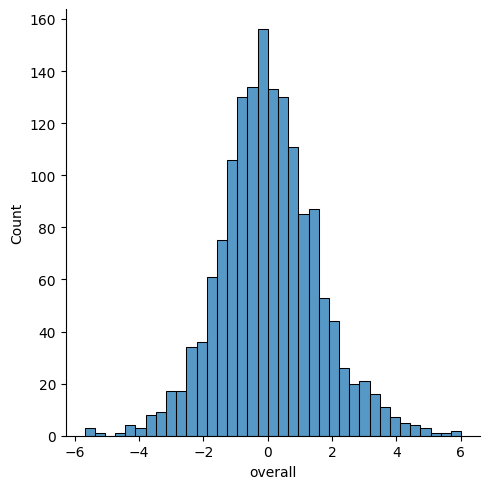

In [8]:
import seaborn as sns
sns.displot(y_pred-y_test)

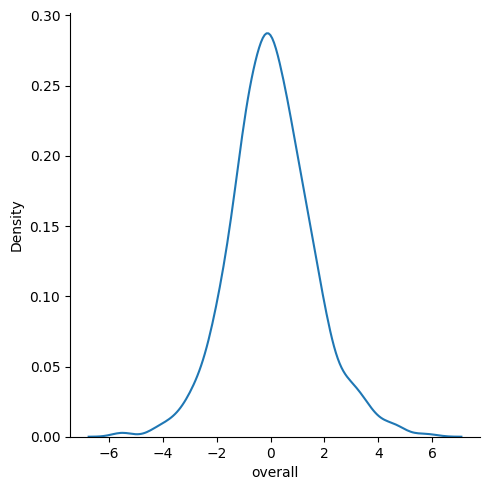

In [9]:
import seaborn as sns
sns.displot(y_pred-y_test,kind="kde")



**Performance** **Matrics**

In [10]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Interpret the Results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 1.1744590008539195
Mean Squared Error: 2.365573213862614
R2 Score: 0.9370778280471169









---



---
**(B)**



Compare the performance of linear regression, Ridge regression, and Lasso regression models. Perform the hyperparameters tuning and observe how they affect the model’s bias-variance trade-off, investigate the impact of the Lasso regularisation parameter on this feature selection process.







In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('football.csv')

X = df.drop(columns=['overall','goalkeeping_speed','player_traits','player_tags','body_type','short_name','club_name','league_name','work_rate','preferred_foot'])
y = df['overall']

X.fillna(X.mean(),inplace=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

**LINEAR REGRESSION**

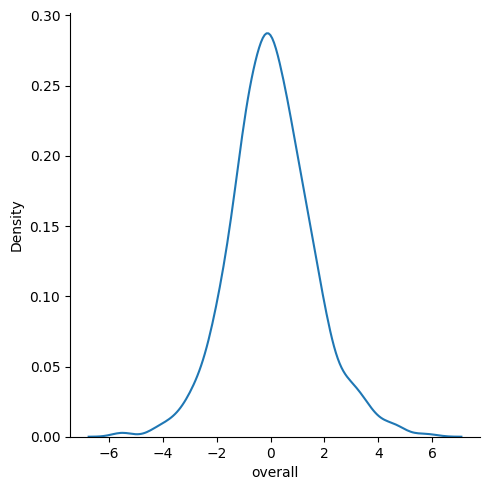

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
import seaborn as sns
sns.displot(linear_reg_predictions-y_test,kind="kde")



**RIDGE REGRESSION**

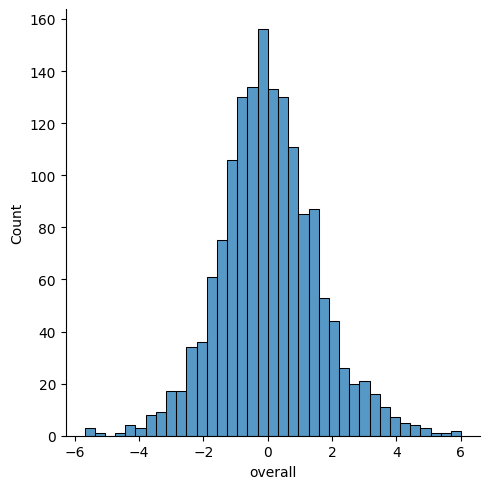

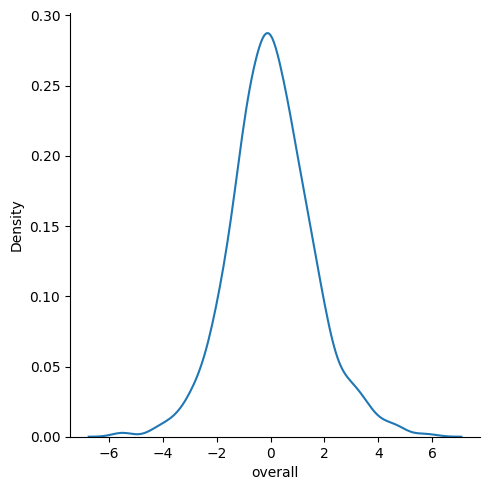

In [17]:
ridge_reg = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_reg, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_predictions = ridge_best.predict(X_test)


import seaborn as sns

sns.displot(y_pred-y_test)
sns.displot(ridge_predictions-y_test,kind="kde")

**LASSO REGRESSION**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.497e+03, tolerance: 1.736e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.574e+03, tolerance: 1.729e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.500e+03, tolerance: 1.740e

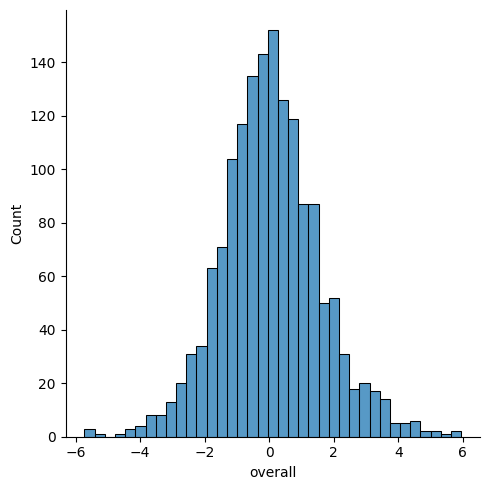

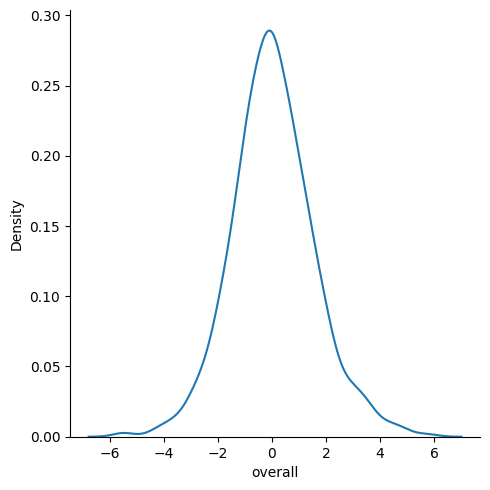

In [18]:
lasso_reg = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso_reg, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_predictions = lasso_best.predict(X_test)

import seaborn as sns
sns.displot(lasso_predictions-y_test)
sns.displot(lasso_predictions-y_test,kind="kde")

EVALUATE ALL 3 MODELS

In [ ]:
def evaluate_model(predictions, y_true):
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mae, mse, r2

For Linear Regression Model:

In [ ]:
linear_reg_scores = evaluate_model(linear_reg_predictions, y_test)


For Ridge Regression Model:

In [ ]:
ridge_scores = evaluate_model(ridge_predictions, y_test)

For Lasso Regression Model:

In [ ]:
lasso_scores = evaluate_model(lasso_predictions, y_test)


In [ ]:
print("Linear Regression Scores (MAE, MSE, R2):", linear_reg_scores)
print("Ridge Regression Scores (MAE, MSE, R2):", ridge_scores)
print("Lasso Regression Scores (MAE, MSE, R2):", lasso_scores)


Linear Regression Scores (MAE, MSE, R2): (1.1744590008539195, 2.365573213862614, 0.9370778280471169)
Ridge Regression Scores (MAE, MSE, R2): (1.1743806795624114, 2.365482161727441, 0.9370802499540241)
Lasso Regression Scores (MAE, MSE, R2): (1.1734947803925664, 2.3678585809012946, 0.9370170392890516)
